Lets see how two alanine molecules orient themselves using CREST conformer generation.
To do this we will constrain the system in a spherical region using the `SphericalWall` constraint.
We start by setting up a system of two alanine molecules in a relatively small space.

## Initial imports

In [1]:
import scm.plams as plams
from scm.conformers import ConformersJob
from scm.conformers.plams.plot import plot_conformers
import numpy as np
import matplotlib.pyplot as plt
import os

## Single alanine molecule

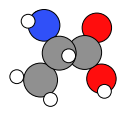

In [2]:
smiles = "CC(N)C(=O)O"
alanine = plams.from_smiles(smiles)
plams.plot_molecule(alanine);

## Initial system: alanine dimer

Pack two alanine molecules in a sphere with a density of 0.5 kg/L.

In [3]:
density = 0.5
mol = plams.packmol(alanine, n_molecules=2, density=density, sphere=True)

Translate the molecule to be centered around the origin (needed for SphericalWall later):

In [4]:
mol.translate(-np.array(mol.get_center_of_mass()))

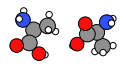

In [5]:
plams.plot_molecule(mol, rotation="0x,0y,90z");

## Calculation setup

To determine the radius of the `SphericalWall` we measure the size of the initial dimer.

In [6]:
dists = plams.distance_array(mol, mol)
max_dist = np.max(dists)
diameter = 1.33 * max_dist
radius = diameter / 2
print(f"Largest distance between atoms: {max_dist:.3f} ang.")
print(f"Radius: {radius:.3f} ang.")

Largest distance between atoms: 9.882 ang.
Radius: 6.572 ang.


Now we can set up the Crest conformer generation job, with the appropriate spherical wall constraining the molecules close together. 

In [7]:
settings = plams.Settings()
settings.input.ams.EngineAddons.WallPotential.Enabled = "Yes"
settings.input.ams.EngineAddons.WallPotential.Radius = radius
settings.input.ams.Generator.Method = "CREST"
settings.input.ams.Output.KeepWorkDir = "Yes"
settings.input.ams.GeometryOptimization.MaxConvergenceTime = "High"
settings.input.ams.Generator.CREST.NCycles = 3  # at most 3 CREST cycles for this demo
settings.input.GFNFF = plams.Settings()

## Run the conformers job

Now we can run the conformer generation job.

In [8]:
job = ConformersJob(molecule=mol, settings=settings)
job.run()
# ConformersJob.load_external("plams_workdir/conformers/conformers.rkf")  # load from disk instead of running the job

[11.03|15:40:06] JOB conformers STARTED
[11.03|15:40:06] JOB conformers RUNNING
[11.03|15:48:41] JOB conformers FINISHED
[11.03|15:48:41] JOB conformers SUCCESSFUL


In [9]:
rkf = job.results.rkfpath()
print(f"Conformers stored in {rkf}")

Conformers stored in /home/hellstrom/temp/confmul-Xni-2024-Mar-11/plams_workdir.005/conformers/conformers.rkf


This job will run for approximately 15 minutes.

## Results
Here we plot the three lowest-energy conformers.

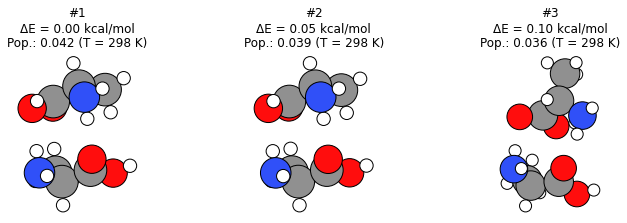

In [10]:
plot_conformers(job);

You can also open the conformers in AMSmovie to browse all conformers 1000+ conformers:

In [11]:
!amsmovie {rkf}